In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv')
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2244\1658783367.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
(df.isnull().sum()/df.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

### Data Cleansing

In [4]:
# Droping columns with NaN values more than 40%,including dti_joint column (Co-borrower's income ratio) because of 100% null values

df1= df[(x for x in df.columns if (((df[x].isnull().sum()/df.shape[0])*100)<40))]
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df1.shape

(39717, 54)

In [7]:
# Check for duplicated entries by ID

check_ids = (df1.id.value_counts() > 1)
unique_ids = [x for x in check_ids if x == True]
unique_ids

[]

#### Segmentation

In [8]:
num_cols= ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','inq_last_6mths',
           'open_acc','pub_rec','revol_bal','revol_util','delinq_2yrs','total_acc','out_prncp','out_prncp_inv','total_pymnt',
           'total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','collection_recovery_fee',
           'last_pymnt_amnt','delinq_amnt','pub_rec_bankruptcies']
cat_cols= ['grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose',
           'zip_code','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
extra_cols = ['id','member_id','emp_title','url','pymnt_plan','total_rec_late_fee','desc','title','initial_list_status','collections_12_mths_ex_med',
              'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','tax_liens']


#emp_title,initial_list_status,collections_12_mths_ex_med,total_rec_late_fee,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,tax_liens is not giving any significant info , hence kept in extra_cols

In [9]:
# Droping extra columns

df1 = df1.drop(extra_cols,axis = 1 )
df1.shape

(39717, 39)

In [10]:
df1[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   annual_inc               39717 non-null  float64
 7   dti                      39717 non-null  float64
 8   inq_last_6mths           39717 non-null  int64  
 9   open_acc                 39717 non-null  int64  
 10  pub_rec                  39717 non-null  int64  
 11  revol_bal                39717 non-null  int64  
 12  revol_util               39667 non-null  object 
 13  delinq_2yrs              39717 non-null  int64  
 14  total_acc             

In [11]:
# Formating columns as per requirement

df1.term = df1.term.apply(lambda x : x.replace(' months','')).astype(int)
df1.int_rate = df1.int_rate.apply(lambda x : x.rstrip('%')).astype(float)
df1.revol_util= df1.revol_util.apply(lambda x : str(x).replace('%','')).astype(float)

In [12]:
df1[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int32  
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   annual_inc               39717 non-null  float64
 7   dti                      39717 non-null  float64
 8   inq_last_6mths           39717 non-null  int64  
 9   open_acc                 39717 non-null  int64  
 10  pub_rec                  39717 non-null  int64  
 11  revol_bal                39717 non-null  int64  
 12  revol_util               39667 non-null  float64
 13  delinq_2yrs              39717 non-null  int64  
 14  total_acc             

In [13]:
df1[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grade                39717 non-null  object
 1   sub_grade            39717 non-null  object
 2   emp_length           38642 non-null  object
 3   home_ownership       39717 non-null  object
 4   verification_status  39717 non-null  object
 5   issue_d              39717 non-null  object
 6   loan_status          39717 non-null  object
 7   purpose              39717 non-null  object
 8   zip_code             39717 non-null  object
 9   addr_state           39717 non-null  object
 10  earliest_cr_line     39717 non-null  object
 11  last_pymnt_d         39646 non-null  object
 12  last_credit_pull_d   39715 non-null  object
dtypes: object(13)
memory usage: 3.9+ MB


In [14]:
# Imputing missing values of Emp_length by '999' 

df1.emp_length = df1.emp_length.fillna(999)
df1.emp_length = df1.emp_length.apply(lambda x : str(x).replace('+','').replace('< 1','0').strip(' years'))
df1.emp_length.value_counts()

emp_length
10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
999    1075
Name: count, dtype: int64

### Univariate Analysis

In [15]:
# Droping current customers which aren't useful for predictions 

cust_final_status = df1[~(df1.loan_status == 'Current')]
cust_final_status

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1008.71,456.46,435.17,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,12231.89,10000.00,2214.92,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,Jul-10,80.90,Jun-10,0,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,Jul-10,281.94,Jul-10,0,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,Apr-08,0.00,Jun-07,0,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,Jan-08,0.00,Jun-07,0,NaN


In [16]:
defaulters = df1[df1.loan_status == 'Charged Off']
defaulters

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1008.71,456.46,435.17,117.08,1.1100,Apr-13,119.66,Sep-13,0,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,646.02,162.02,294.94,189.06,2.0900,Apr-12,152.39,Aug-12,0,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,...,1469.34,673.48,533.42,269.29,2.5200,Nov-12,121.45,Mar-13,0,0.0
12,9000,9000,9000.0,36,13.49,305.38,C,C1,0,RENT,...,2270.70,1256.14,570.26,444.30,4.1600,Jul-12,305.38,Nov-12,0,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,...,7471.99,5433.47,1393.42,645.10,6.3145,Oct-13,325.74,Mar-14,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36,12.80,84.00,D,D4,0,MORTGAGE,...,599.28,1706.01,477.21,35.70,0.3800,Mar-10,1.76,May-16,0,NaN
39668,2500,2500,825.0,36,9.64,80.26,B,B4,0,MORTGAGE,...,688.35,1730.83,354.44,0.00,0.0000,Mar-10,1.40,May-16,0,NaN
39669,6500,6500,225.0,36,15.01,225.37,F,F1,9,MORTGAGE,...,139.42,2886.21,1168.14,0.00,0.0000,Feb-09,225.37,May-16,0,NaN
39678,1000,1000,950.0,36,10.59,32.55,C,C2,2,MORTGAGE,...,668.87,544.02,138.64,21.29,0.2300,May-09,32.55,Oct-09,0,NaN


In [17]:
bonafides = df1[df1.loan_status == 'Fully Paid']
bonafides

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.0,0.0,Jan-15,171.62,May-16,0,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,3005.67,2400.00,605.67,0.0,0.0,Jun-14,649.91,May-16,0,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,12231.89,10000.00,2214.92,0.0,0.0,Jan-15,357.48,Apr-16,0,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,5632.21,5000.00,632.21,0.0,0.0,Jan-15,161.03,Jan-16,0,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,...,10110.84,6985.61,3125.23,0.0,0.0,May-16,1313.76,May-16,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,1213.88,2500.00,322.97,0.0,0.0,Jul-10,80.90,Jun-10,0,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,1020.51,8500.00,1413.49,0.0,0.0,Jul-10,281.94,Jul-10,0,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,1397.12,5000.00,272.16,0.0,0.0,Apr-08,0.00,Jun-07,0,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,...,672.66,5000.00,174.20,0.0,0.0,Jan-08,0.00,Jun-07,0,NaN


In [18]:
df1.addr_state.value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

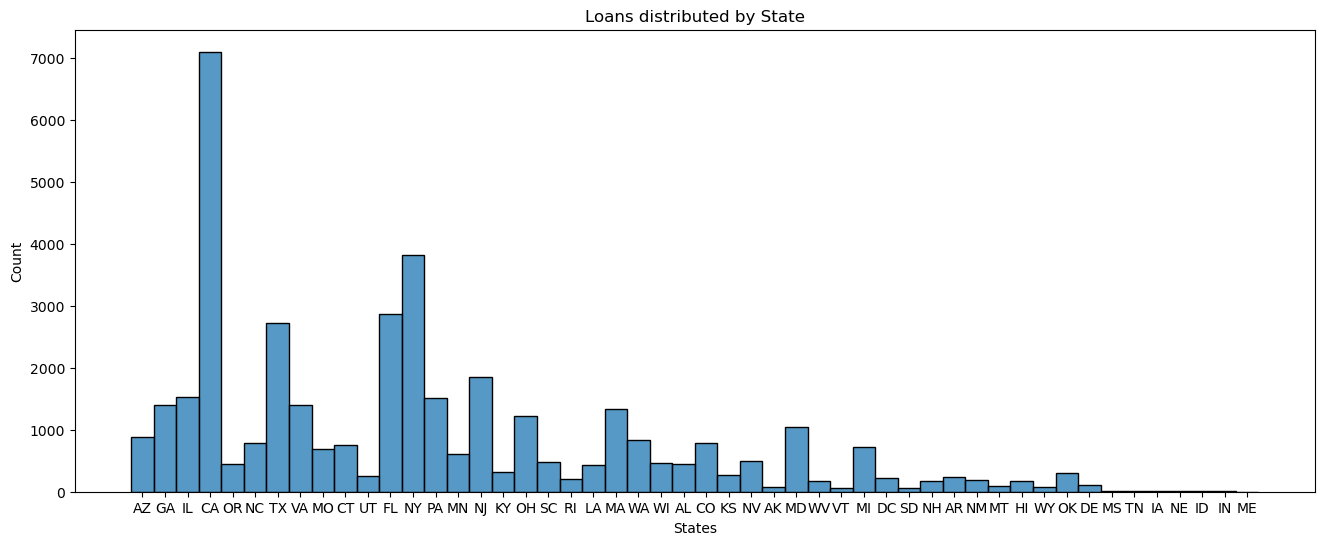

In [19]:
# Loans distributed by State

plt.figure(figsize=(16,6))
sns.histplot(df1.addr_state)
plt.title('Loans distributed by State')
plt.xlabel('States')
plt.show()

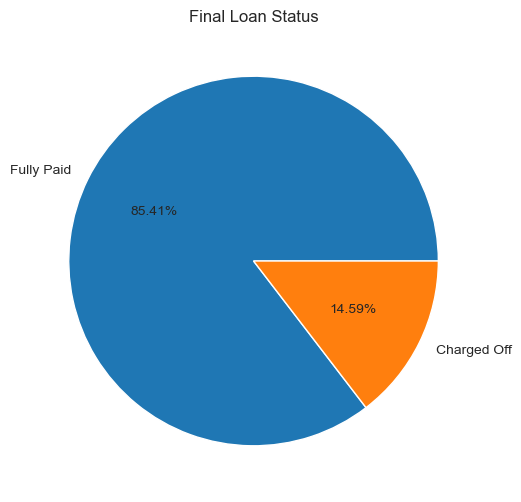

In [20]:
#### Customers with Final Status , that is Fully Paid off vs Charged off customers

pie_values = [bonafides.shape[0],defaulters.shape[0]]
pie_keys = ['Fully Paid','Charged Off']


sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(pie_values, labels=pie_keys, autopct='%.2f%%')
plt.title('Final Loan Status')
plt.show()

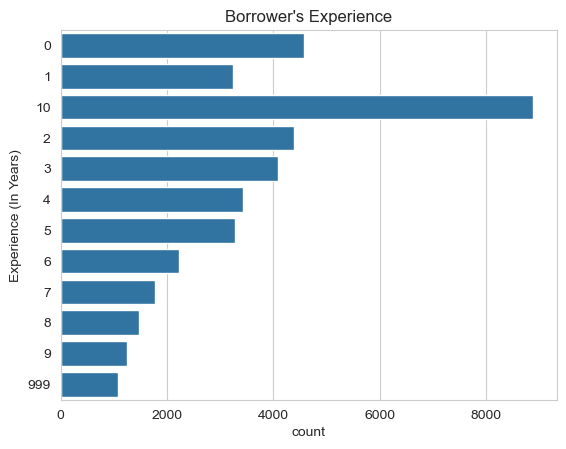

In [21]:
# Loan distribution by borrower's experience 

sns.countplot(data=df1.emp_length.sort_values(ascending=True))
plt.title("Borrower\'s Experience")
plt.ylabel('Experience (In Years)')
plt.show()

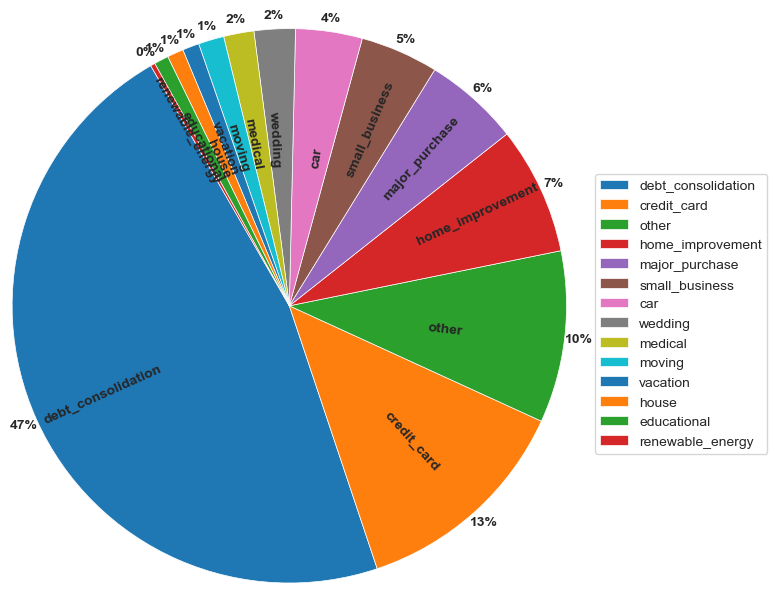

In [22]:
# Purpose of taking loans

plt.figure(figsize=(8,6))
plt.pie(cust_final_status.purpose.value_counts().values, labels=cust_final_status.purpose.value_counts().keys(),startangle=120,pctdistance=1.05,
        radius =1.5, labeldistance=.5, autopct='%1.0f%%',textprops={'fontweight':'bold','fontsize':10,},rotatelabels=True,
        wedgeprops={'linewidth':.5,'edgecolor':"white"})

plt.legend(bbox_to_anchor=(0.5, 0.3, 1.05, 0.5))
plt.show()

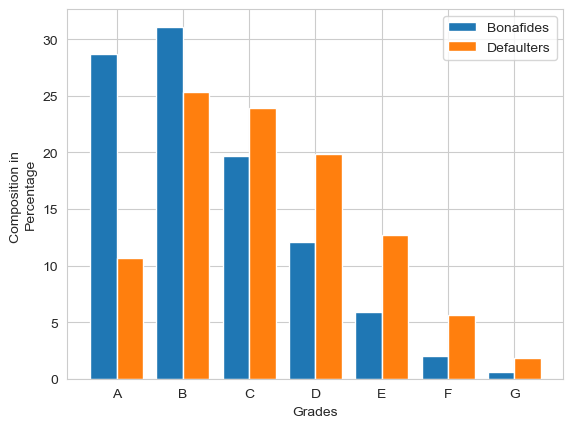

In [23]:
# Analysis basis on  Grades 

grades = ['A','B','C','D','E','F','G']
b_grades = (bonafides.grade.value_counts()/32950)*100
d_grades = (defaulters.grade.value_counts()/5627)*100

b_grades_f = [b_grades[x] for x in grades if x in b_grades.keys()]
d_grades_f = [d_grades[x] for x in grades if x in d_grades.keys()]

w = 0.4
pos  = [0,1,2,3,4,5,6]
pos0 = [x+(w/2) for x in pos]
pos1 = [x+w for x in pos]

plt.bar(pos,b_grades_f,w)
plt.bar(pos1,d_grades_f,w)
plt.xticks(pos0,grades)
plt.xlabel('Grades')
plt.ylabel('Composition in \nPercentage')
plt.legend(['Bonafides','Defaulters'])
plt.show()


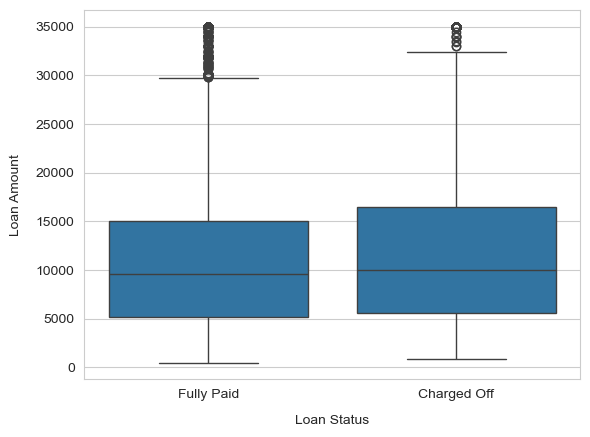

In [24]:
sns.boxplot(x=cust_final_status.loan_status, y=cust_final_status.loan_amnt )
plt.xlabel('Loan Status',labelpad = 10.0)
plt.ylabel('Loan Amount',labelpad = 10.0)
plt.show()

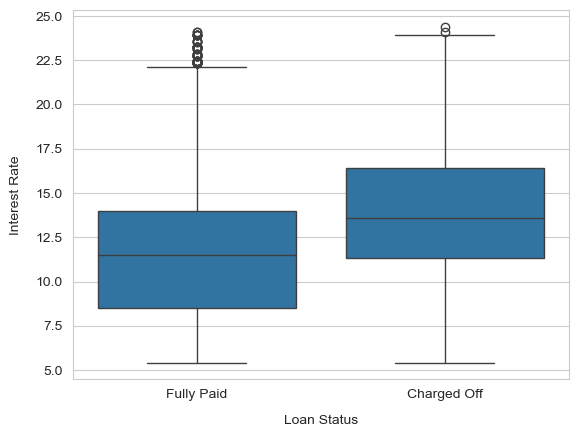

In [25]:
#Interest Rate comparision 

sns.boxplot(x=cust_final_status.loan_status, y=cust_final_status.int_rate )
plt.xlabel('Loan Status',labelpad = 10.0)
plt.ylabel('Interest Rate',labelpad = 10.0)
plt.show()

### Comparing Bonafides and Defaulters on their DTI

### After removing outliers

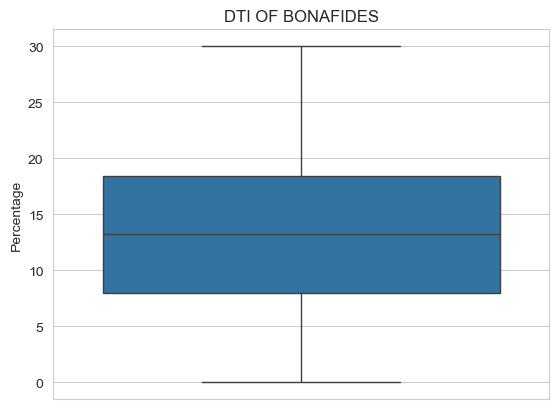

In [26]:
b_Q1 = bonafides.dti.quantile(0.25)
b_Q3 = bonafides.dti.quantile(0.75)
b_IQR = b_Q3 - b_Q1    #IQR is interquartile range. 
b_filter = [x for x in bonafides.dti if (x >=b_Q1 - 1.5 * b_IQR) & (x <= b_Q3 + 1.5 * b_IQR)]


sns.boxplot(b_filter)
plt.title('DTI OF BONAFIDES')
plt.ylabel('Percentage')
plt.show()

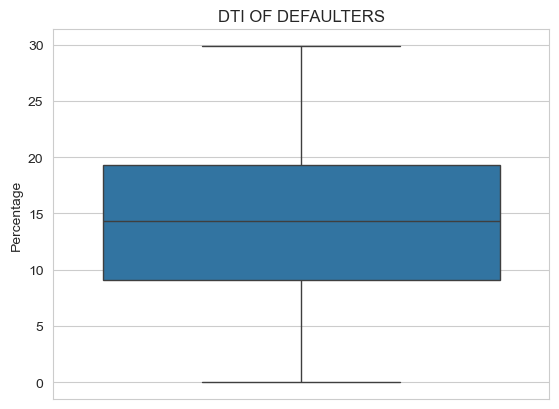

In [27]:
# After removing outliers

d_Q1 = defaulters.dti.quantile(0.25)
d_Q3 = defaulters.dti.quantile(0.75)
d_IQR = d_Q3 - d_Q1    #IQR is interquartile range. 

d_filter = [x for x in defaulters.dti if (x >=d_Q1 - 1.5 * d_IQR) & (x <= d_Q3 + 1.5 * d_IQR)]

sns.boxplot(d_filter)
plt.title('DTI OF DEFAULTERS')
plt.ylabel("Percentage")
plt.show()

### Understanding Percentage of Defaulters by State

In [28]:
defaulters.addr_state.value_counts()

addr_state
CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
NC     114
MO     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
NH      25
RI      25
WV      21
DC      15
AK      15
DE      12
SD      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: count, dtype: int64

In [29]:
d_state_percentage=(defaulters.addr_state.value_counts()/df1.addr_state.value_counts())*100

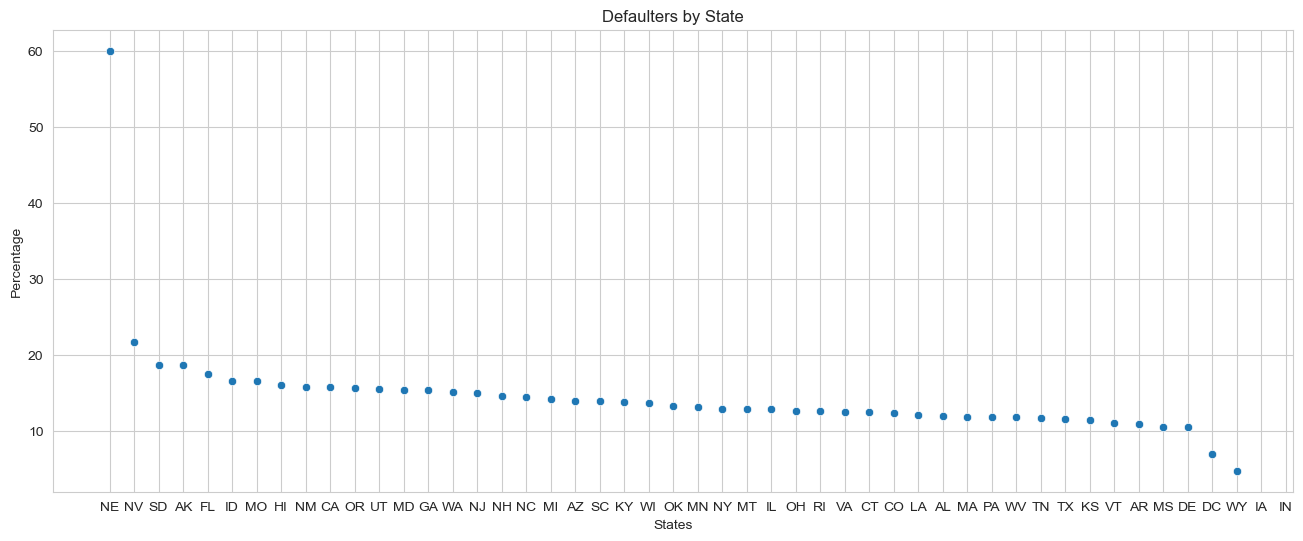

In [30]:
from matplotlib.pyplot import figure

figure(figsize=(16,6))
sns.scatterplot(d_state_percentage.sort_values(ascending=False))
plt.xlabel('States')
plt.ylabel('Percentage')
plt.title('Defaulters by State')
plt.show()

# Note - State 'NE' has only 5 borrowers so it cannot have significant impact on analysis.